---
title: "Dimensionality Reduction and Principal Component Analysis"
code-fold: True
code-summary: "Show the code"
---

**Project Proposal: Dimensionality Reduction and Visualization of Stock Market Data**

**Project Objectives:**
The primary objective of this project is to employ dimensionality reduction techniques to transform high-dimensional stock market data of Bed Bath and Beyond stock into a two-dimensional space for visualization purposes. By leveraging PCA and t-SNE, we aim to uncover underlying trends and patterns that can provide insights into the stock's behavior. This analysis will help in identifying days with significant market movements, discovering clusters of similar trading behaviors, and potentially predicting future market trends based on historical data.

**Dataset Selection:**
We will utilize a historical stock dataset that includes daily price information such as opening, closing, high, low, adjusted close prices, and trading volume. This dataset provides a comprehensive view of the market's daily movements and is ideal for observing both global and local structures within the data.

**Tools and Libraries:**

- **Python**: As a versatile programming language with extensive support for data analysis and machine learning, Python will be the backbone of this project.
- **pandas**: To handle data manipulation and preprocessing, pandas will be used for its powerful data structures and functions.
- **NumPy**: Essential for numerical computing in Python, NumPy will aid in efficient computations of numerical data.
- **scikit-learn**: This library provides straightforward and efficient tools for data mining and analysis. It includes implementations of PCA and t-SNE, which will be central to our dimensionality reduction efforts.
- **matplotlib** and **Seaborn**: For visualization, these libraries will help us create informative and interactive plots to display the results of PCA and t-SNE.
- **Jupyter Notebook**: An open-source web application that allows us to create and share documents containing live code, equations, visualizations, and narrative text.


**Methodology:**

1. **Dimensionality Reduction via PCA**: Implementing PCA through scikit-learn, we'll reduce the multidimensional stock data to the two most significant principal components. This process will highlight the major axes of variation and may reveal the most impactful factors affecting stock prices.

2. **Local Pattern Exploration with t-SNE**: After PCA, we'll apply t-SNE to the same dataset to identify clusters of similar trading behavior. t-SNE is particularly adept at highlighting intricate structures and revealing how individual stocks relate to each other on specific trading days.

3. **Visual Analysis**: We'll generate comprehensive plots of the reduced dimensions using matplotlib and Seaborn. These visualizations will not only confirm or challenge our hypotheses about market behaviors but also help in communicating complex data in an accessible format.

4. **Synthesis and Insights**: The final step will be to synthesize the findings from both PCA and t-SNE, interpret the significance of the visual patterns, and extract actionable insights. We'll document patterns corresponding to market trends, anomalies, and correlations uncovered during analysis.


## Importing libraries


In [13]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Reading in the Dataframe

In [14]:
df = pd.read_csv('../data/bbbyopen.csv')

# Remove the 'Date' and 'Adj Close' columns as they are not needed for this analysis
df = df.drop(['Date', 'Adj Close'], axis=1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


## Performing Principal Component Analysis

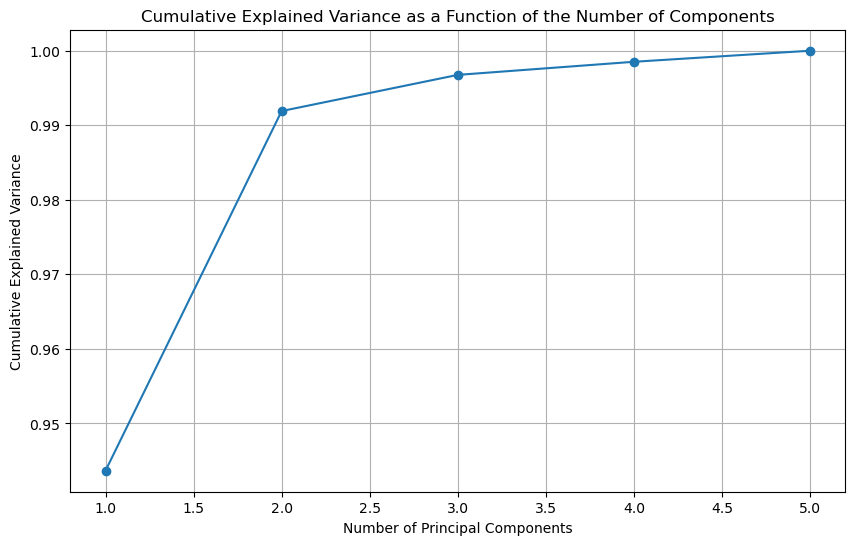

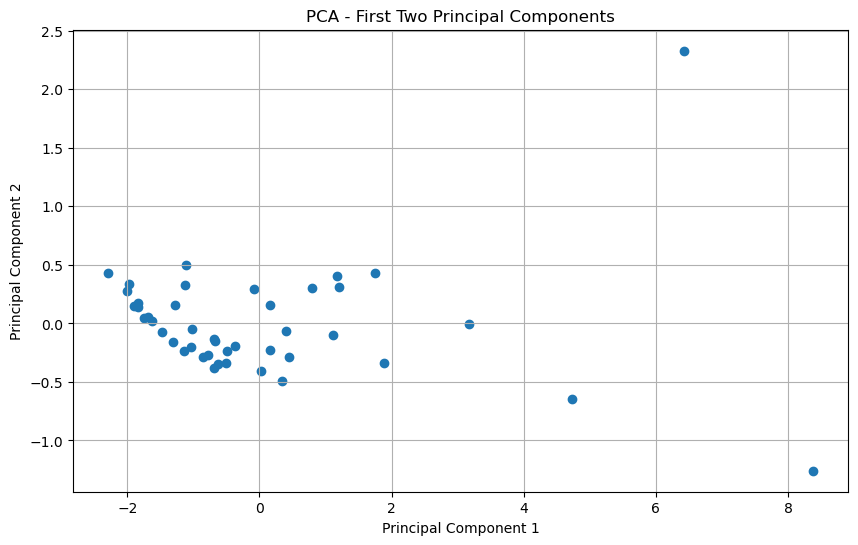

In [15]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# To determine the optimal number of principal components, we look at the explained variance ratio
pca_full = PCA()
pca_full_result = pca_full.fit(scaled_data)
explained_variance_ratio = pca_full.explained_variance_ratio_

# Plotting the cumulative explained variance to find the optimal number of components
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Visualizing the reduced-dimensional data using the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In the above, we can see that Principal Component 1 and 2 are fairly correlated. Which makes these ideal for our dataset. Choosing 2 Principal Components is ideal in this case as the variance does not change a lot between two Principal Components and three Principal Components.

# Parameter Tunining for TSNE

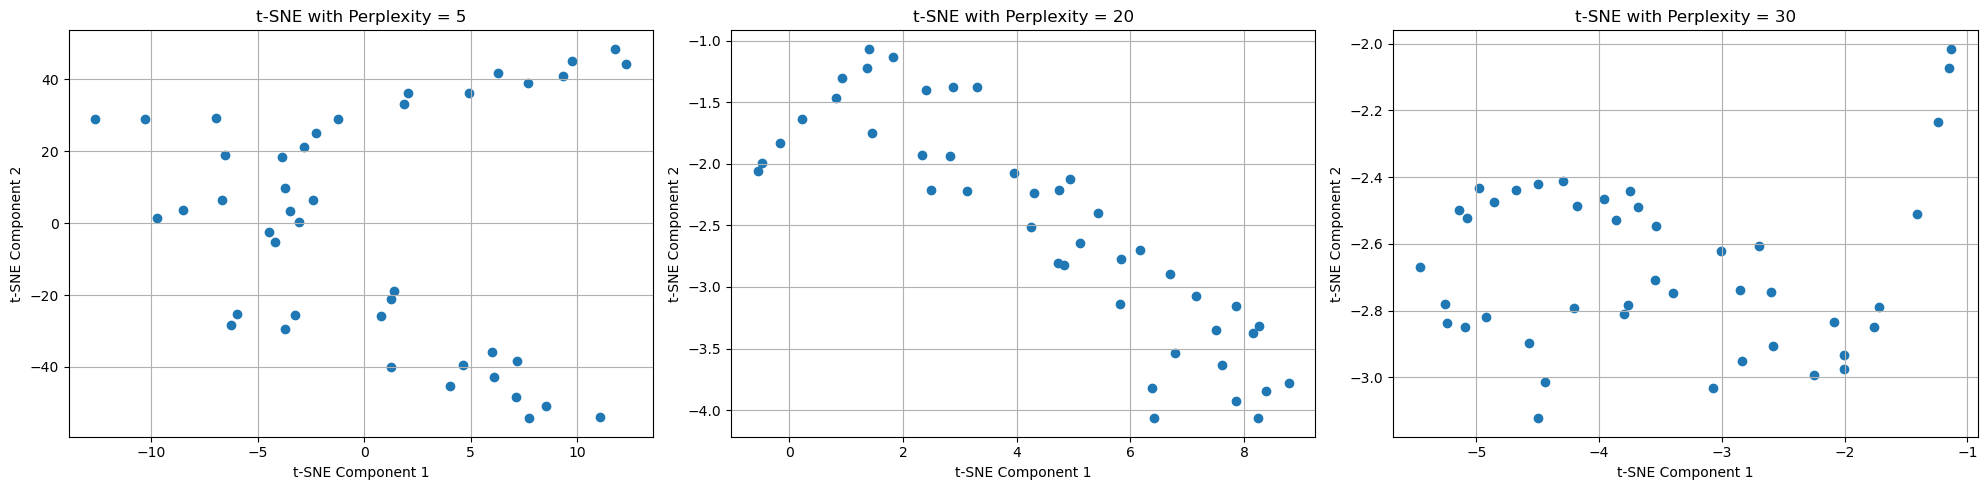

In [16]:
# t-SNE
tsne = TSNE(n_components=2, perplexity=30)  
tsne_result = tsne.fit_transform(scaled_data)

# Exploring different perplexity values for t-SNE
perplexities = [5, 20, 30]
tsne_results = {}

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity)
    tsne_results[perplexity] = tsne.fit_transform(scaled_data)

# Visualization of t-SNE results for different perplexities
fig, axes = plt.subplots(1, len(perplexities), figsize=(20, 5))

for idx, perplexity in enumerate(perplexities):
    axes[idx].scatter(tsne_results[perplexity][:, 0], tsne_results[perplexity][:, 1])
    axes[idx].set_title(f't-SNE with Perplexity = {perplexity}')
    axes[idx].set_xlabel('t-SNE Component 1')
    axes[idx].set_ylabel('t-SNE Component 2')
    axes[idx].grid(True)

plt.tight_layout()
plt.show()


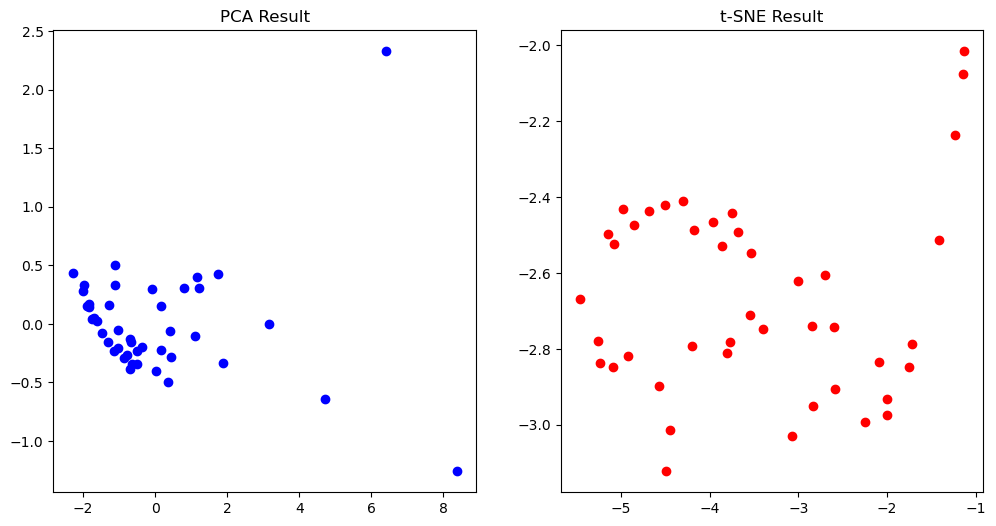

In [17]:
# Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue')
plt.title('PCA Result')

plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='red')
plt.title('t-SNE Result')

plt.show()

### Principal Component Analysis (PCA): Revealing Market Drivers

 In our analysis, the PCA plot vividly illustrates the dominant pattern of stock price movements and trading volumes. The horizontal spread signifies a primary factor influencing the dataset—potentially an overarching market trend or a sector influence that affects all the stocks under review.

Notably, points distant from the main cluster may represent extraordinary trading days. These could be the result of major announcements, earnings releases, or other pivotal events that cause significant market reactions.

### t-Distributed Stochastic Neighbor Embedding (t-SNE): Mapping Trading Behaviors

While PCA captures broad trends, t-SNE focuses on the finer details, clustering the data based on local similarities. The tight grouping observed in the t-SNE plot suggests days with analogous trading patterns, providing a microscopic view of the market's inner workings. This method excels in highlighting the subtler correlations and clusters that might not be evident with PCA, such as specific periods characterized by uniform trading behavior.

### Comparative Insights: 

The juxtaposition of PCA and t-SNE results yields a comprehensive picture. PCA is instrumental for pinpointing overarching trends and identifying outliers that merit further investigation. Conversely, t-SNE offers a granular perspective, clustering together days with similar stock movements, which could reveal routine trading patterns or responses to market conditions.

Each visualization tells a part of the story, and together, they form a holistic narrative of the stock market's ebbs and flows. By leveraging these visual tools, one can not only discern the market's pulse but also pinpoint specific days or events that warrant a closer look for informed decision-making.
